# **Project Overview**
This project involves an in-depth exploratory analysis of a Netflix dataset to uncover meaningful insights and patterns in the platform's content. Key focus areas include analyzing the distribution of release years, identifying the most frequent actors, and exploring popular genres. Visualizations were created to highlight trends, such as the increasing number of releases over the years, the dominance of specific actors, and the popularity of documentaries and stand-up comedy.

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/netflix_titles.csv')

# **Loading Dataset**

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# **Exploring the Data**

In [5]:
#shape of data
df.shape

(6234, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# Description:

1. **show_id**: A unique identifier for each show or movie in the dataset.  
2. **type**: Indicates whether the entry is a "Movie" or "TV Show".  
3. **title**: The name of the show or movie.  
4. **director**: The name of the director of the show or movie (may be missing for some entries).  
5. **cast**: The main actors and actresses involved in the show or movie (may be missing for some entries).  
6. **country**: The country where the show or movie was produced (may be missing for some entries).  
7. **date_added**: The date when the show or movie was added to the platform (may be missing for some entries).  
8. **release_year**: The year when the show or movie was originally released.  
9. **rating**: The content rating (e.g., PG, TV-MA) indicating the target audience (may be missing for some entries).  
10. **duration**: The duration of the movie (in minutes) or the number of seasons for TV shows.  
11. **listed_in**: The genres or categories the show or movie belongs to (e.g., Drama, Comedy).  
12. **description**: A brief summary or description of the show or movie.  


In [7]:
#checking null values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,1969
cast,570
country,476
date_added,11
release_year,0
rating,10
duration,0


In [8]:
df.nunique()

,0
show_id,6234
type,2
title,6172
director,3301
cast,5469
country,554
date_added,1524
release_year,72
rating,14
duration,201


In [9]:
df.duplicated().sum()

0

# **Cleaning the Data**

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df.fillna({'rating':'unavailable','director':'unknown', 'cast':'unavailable','country':'unavailable'}, inplace=True)
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,11
release_year,0
rating,0
duration,0


**Imputation of Missing Values in Netflix Dataset**

Missing values in selected columns of the Netflix dataset are imputed with the placeholder value "Unknown." The columns chosen for imputation include 'director,' 'country,' 'cast,' 'rating,' and 'duration.

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

In [13]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6223,70204989,TV Show,Gunslinger Girl,unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6225,70153412,TV Show,Frasier,unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6226,70243132,TV Show,La Familia P. Luche,unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6227,80005756,TV Show,The Adventures of Figaro Pho,unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6228,80159925,TV Show,Kikoriki,unknown,Igor Dmitriev,unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,unknown,unavailable,unavailable,NaT,2016,unavailable,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [14]:
most_recent_date = df.date_added.max()
df.date_added.fillna(most_recent_date, inplace=True)

<ipython-input-14-a73e7fedb1ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.date_added.fillna(most_recent_date, inplace=True)


In [15]:
df.describe()

,show_id,date_added,release_year
count,6.234000e+03,6234,6234.00000
mean,7.670368e+07,2018-07-02 15:33:12.300288768,2013.35932
min,2.477470e+05,2008-01-01 00:00:00,1925.00000
25%,8.003580e+07,2017-10-01 00:00:00,2013.00000
50%,8.016337e+07,2018-09-30 00:00:00,2016.00000
75%,8.024489e+07,2019-06-13 00:00:00,2018.00000
max,8.123573e+07,2020-01-18 00:00:00,2020.00000
std,1.094296e+07,NaN,8.81162


# Description:
### 1. **show_id**
- Represents unique identifiers for each show/movie.
- Count: 6,234 records.
- Min: Earliest ID, Max: Latest ID.
- Mean and Standard Deviation indicate the distribution of IDs.

### 2. **date_added**
- The date when content was added to the platform.
- Min: Earliest addition (2008), Max: Latest addition (2020).
- Mean: Most content added around mid-2018.
- Percentiles (25%, 50%, 75%) show when significant portions of content were added.

### 3. **release_year**
- The year the content was originally released.
- Min: Oldest content (1925), Max: Newest content (2020).
- Mean: Most content released around 2013.
- Percentiles highlight release year trends, with 50% of content released before 2016.

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# **Data Visualizations**

Let's take look at types of shows that has been watched on Netflix

In [17]:
df.type.value_counts()

,count
type,
Movie,4265
TV Show,1969


**Distribution of movies and shows**

<ipython-input-18-6dc8740ab284>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df,palette = ['#b20710', '#4a4a4a'])


Text(0.5, 1.0, 'Distribution of Movie and TV Shows')

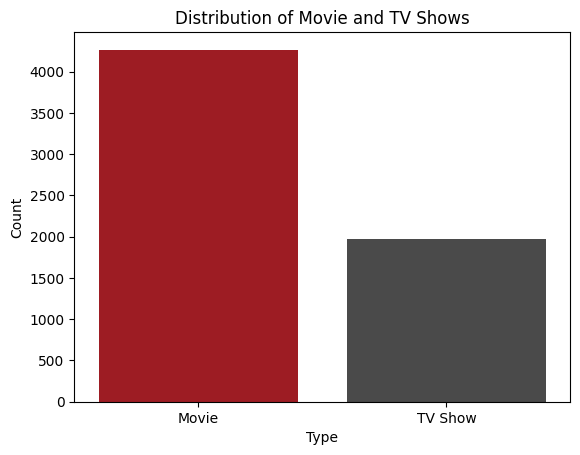

In [18]:

sns.countplot(x='type', data=df,palette = ['#b20710', '#4a4a4a'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Movie and TV Shows')



*  Netflix offers significantly more movies than TV shows, as evident from the higher bar for movies.
*   This suggests a stronger focus on movie content compared to TV shows.



**Rating of Shows and Movies**

<ipython-input-19-f0d40eef284b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:19],palette=['#b20710', '#4a4a4a'])
<ipython-input-19-f0d40eef284b>:1: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:19],palette=['#b20710', '#4a4a4a'])


Text(0.5, 1.0, 'Rating')

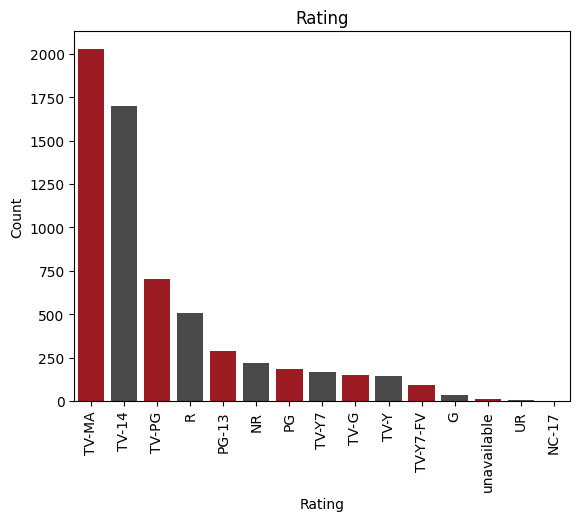

In [19]:

sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:19],palette=['#b20710', '#4a4a4a'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Rating')


*   The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

*  Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

*   Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".










**Relation between Rating and Type**

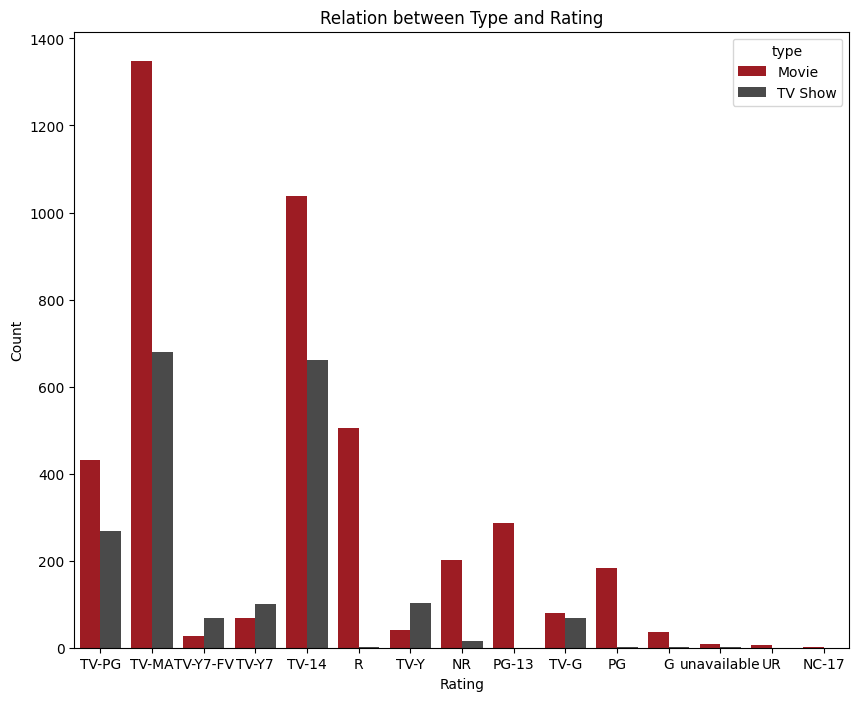

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df, palette=['#b20710', '#4a4a4a'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Relation between Type and Rating')
plt.show()



*  Movies have diverse ratings, while TV shows are concentrated in a few categories.
*  Ratings distribution varies significantly between movies and TV shows.



**Year wise Analysis**

<ipython-input-21-cf8f3f66a4fd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="release_year", data=df, palette=['#b20710', '#4a4a4a'], order=df['release_year'].value_counts().index[0:15])
<ipython-input-21-cf8f3f66a4fd>:1: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y="release_year", data=df, palette=['#b20710', '#4a4a4a'], order=df['release_year'].value_counts().index[0:15])


<Axes: xlabel='count', ylabel='release_year'>

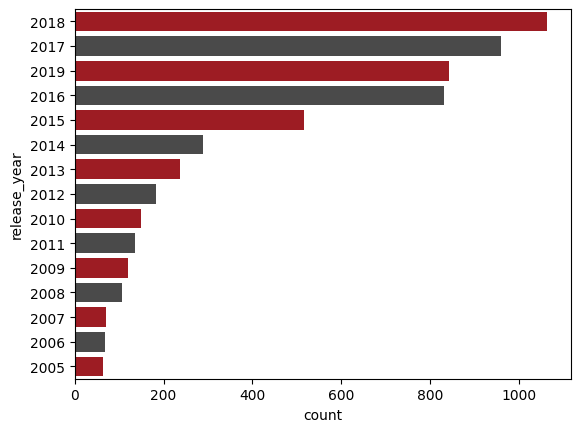

In [21]:
sns.countplot(y="release_year", data=df, palette=['#b20710', '#4a4a4a'], order=df['release_year'].value_counts().index[0:15])



*   Content release peaks around recent years (2017-2020).
*   Netflix has been actively adding newer content.



**Disrtibution Type over Pie chart**

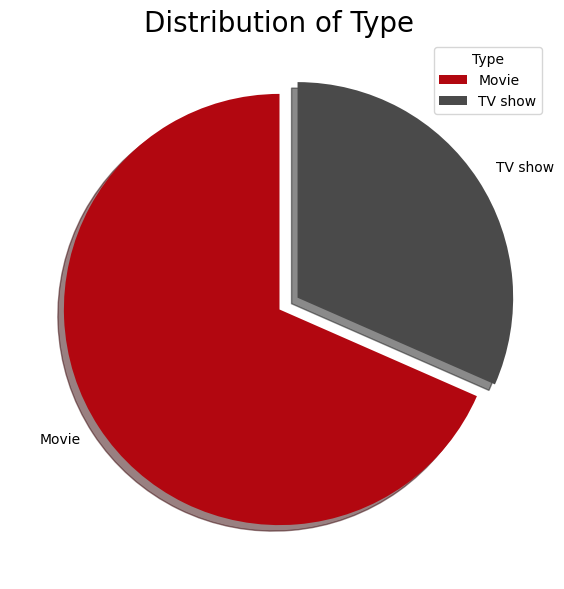

In [22]:
colors = ['#b20710', '#4a4a4a']
plt.figure(figsize=(7,7))
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
explode = [0, 0.1]
plt.pie(size, labels=labels, explode=explode, colors=colors, shadow=True, startangle=90)
plt.title('Distribution of Type', fontsize=20)
plt.legend(title="Type",loc='upper right')
plt.show()



*   Movies are significantly more prevalent than TV shows. The red slice, representing movies, occupies a much larger portion of the pie compared to the gray slice for TV shows.




****

**Top 10 Genres of Movies**

Text(0.5, 1.0, 'Top 10 Genres of Movies')

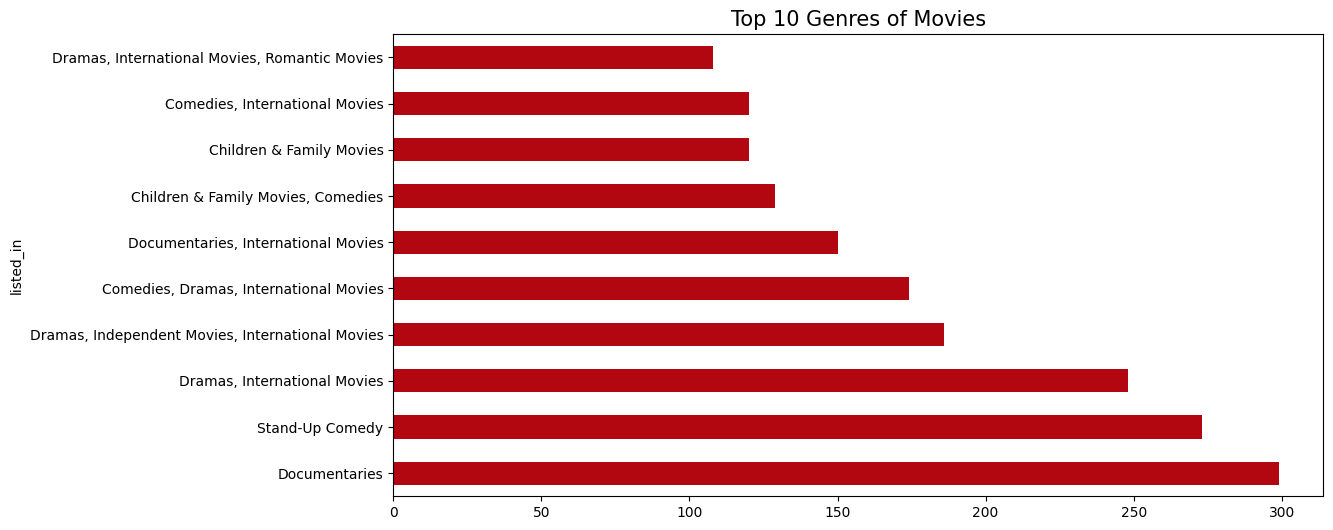

In [23]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="#b20710")
plt.title("Top 10 Genres of Movies",size=15)



* Documentaries are the most common genre, followed by Stand-Up Comedy and Dramas (International Movies).
*  Genres that combine multiple themes, like Comedies and International Movies or Dramas and Romantic Movies, are also popular.

*   Children & Family Movies and combinations like Comedies & Dramas appear frequently, highlighting diversity in content.
*   In summary, documentaries dominate the list, while mixed-genre combinations are also highly preferred.





**Top 10 Genres of TV Shows**

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

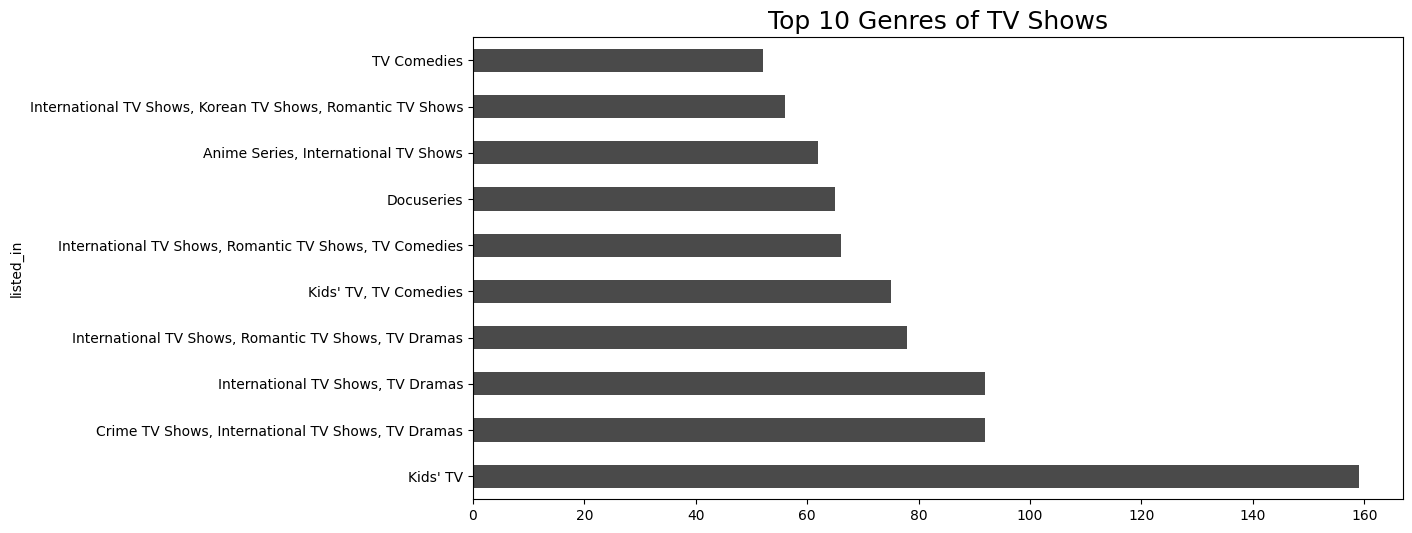

In [24]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="#4a4a4a")
plt.title("Top 10 Genres of TV Shows",size=18)



*   Kids' TV is the most popular, meaning there are the most shows in this category.
*   Comedies are also very popular.
Shows from other countries ("International TV Shows") are also quite common, often combined with other genres like romance or drama.



**Top 10 Countries**

In [25]:
country_counts = df['country'].value_counts()
Top_countries = country_counts.head(10)
Top_countries

,count
country,
United States,2032
India,777
unavailable,476
United Kingdom,348
Japan,176
Canada,141
South Korea,136
Spain,117
France,90


<ipython-input-26-a33fc1c2644e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['country'].value_counts()[:10].index, y=df['country'].value_counts()[:10].values, palette=['#b20710', '#4a4a4a'])
<ipython-input-26-a33fc1c2644e>:3: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df['country'].value_counts()[:10].index, y=df['country'].value_counts()[:10].values, palette=['#b20710', '#4a4a4a'])


Text(0, 0.5, 'No of Movies')

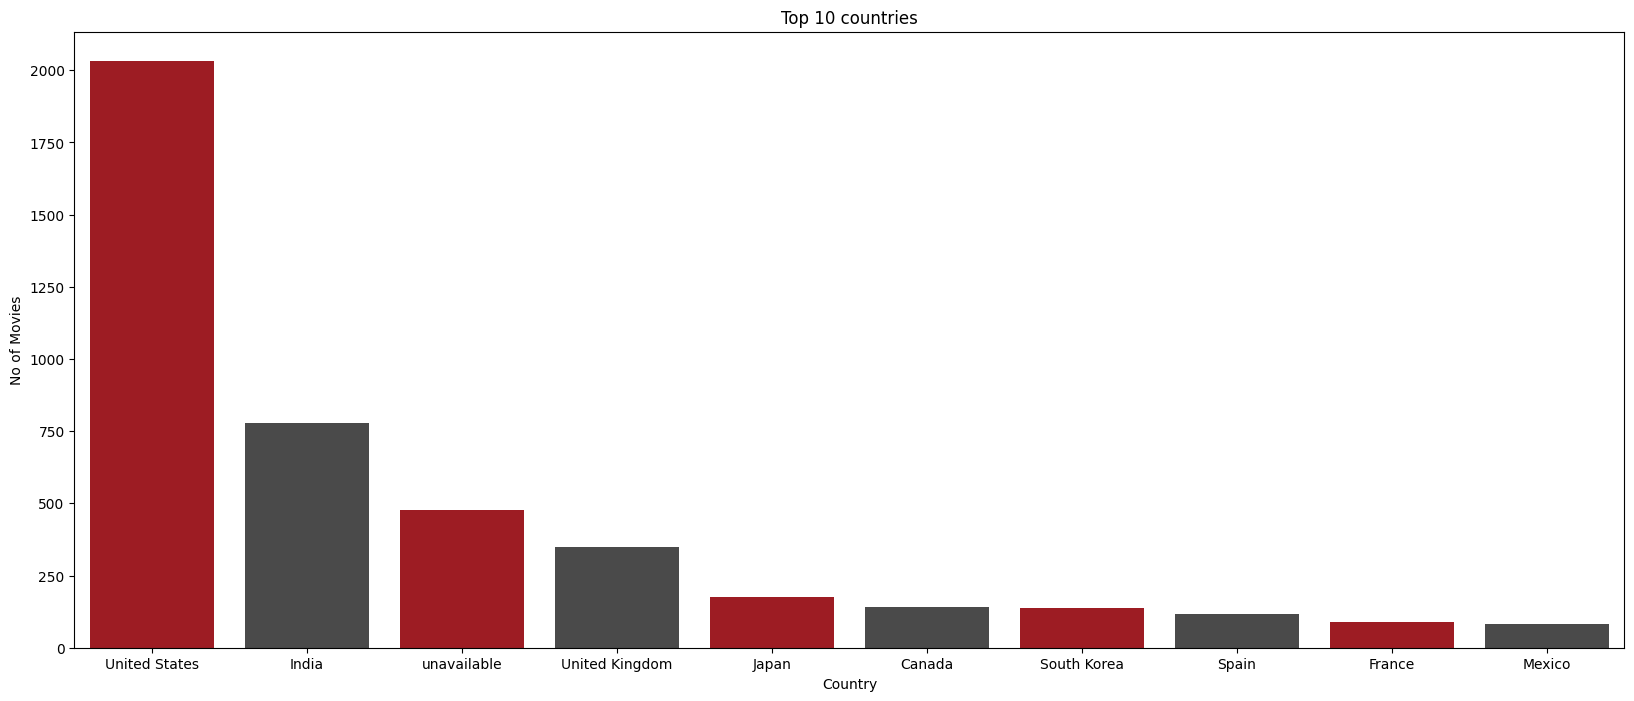

In [26]:
plt.figure(figsize=(20,8))
plt.title('Top 10 countries')
sns.barplot(x=df['country'].value_counts()[:10].index, y=df['country'].value_counts()[:10].values, palette=['#b20710', '#4a4a4a'])
plt.xlabel('Country')
plt.ylabel('No of Movies')



*   The United States leads as the top content producer for Netflix, followed by India and the United Kingdom.
*   This reflects Netflix's strong partnerships in these countries to cater to their audience preferences.



<Axes: xlabel='country', ylabel='count'>

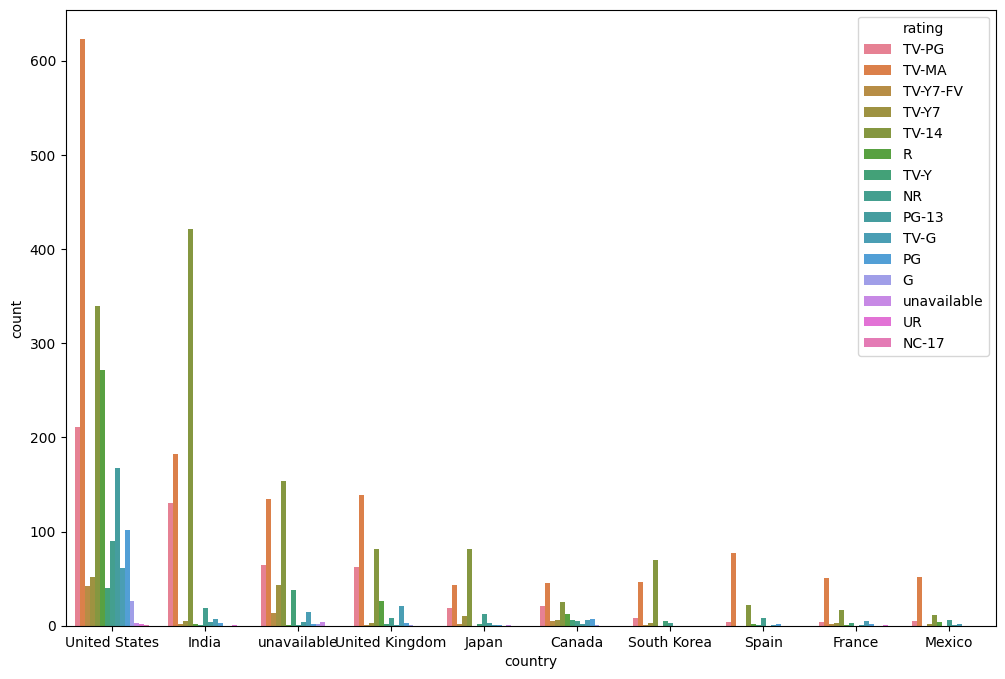

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x = df['country'], order =Top_countries.index, hue =df['rating'] )

In the United States, most shows are rated 'TV-MA.' Moving over to India, the majority of shows have a 'TV-14' rating. Now, let's hop to the United Kingdom, where you'll find that most shows are rated 'TV-MA' as well. Finally, in Japan, the common rating for most shows is 'TV-14.

 **Top Directors by frequency**

In [28]:
Top_directors=df['director'].value_counts()[:10]
Top_directors

,count
director,
unknown,1969
"Raúl Campos, Jan Suter",18
Marcus Raboy,14
Jay Karas,13
Jay Chapman,12
Steven Spielberg,9
Martin Scorsese,9
David Dhawan,8
Lance Bangs,8


<ipython-input-29-6dd292c8ffdd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_10_directors, y=top_10_directors.index, palette=['#b20710', '#4a4a4a'])
<ipython-input-29-6dd292c8ffdd>:3: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot( x=top_10_directors, y=top_10_directors.index, palette=['#b20710', '#4a4a4a'])


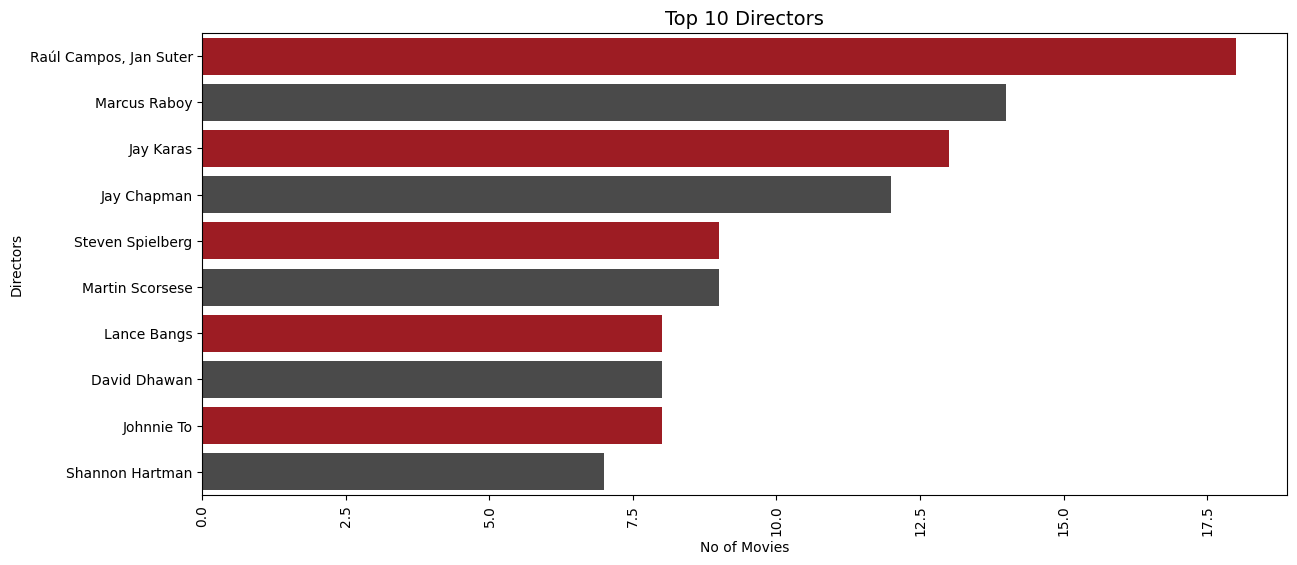

In [29]:
plt.figure(figsize=(14, 6))
top_10_directors = df[df['director'] != "unknown"]['director'].value_counts().head(10)
sns.barplot( x=top_10_directors, y=top_10_directors.index, palette=['#b20710', '#4a4a4a'])
plt.title('Top 10 Directors', fontsize=14)
plt.xlabel('No of Movies')
plt.ylabel('Directors')
plt.xticks(rotation=90)
plt.show()



*   The bar chart presents the top 10 directors with the maximum number of movies on Netflix.

*   Raul Campos, Jan Suter takes the lead with the highest number of movies, followed by Marcus Raboy and Jay Karas. The chart highlights the prolific presence of these directors in Netflix's content library.
*   The chart highlights the prolific presence of these directors in Netflix's content library.



**Top Actors by frequency**

In [30]:
df['cast'] = df['cast'].str.split(', ')
df_cast = df.explode('cast')
cast_counts = df_cast['cast'].value_counts()

<ipython-input-31-0664cfdbdaca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_20_Actors, y=Top_20_Actors.index, palette=['#b20710', '#4a4a4a'])
<ipython-input-31-0664cfdbdaca>:5: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=Top_20_Actors, y=Top_20_Actors.index, palette=['#b20710', '#4a4a4a'])


Text(0, 0.5, 'Actors')

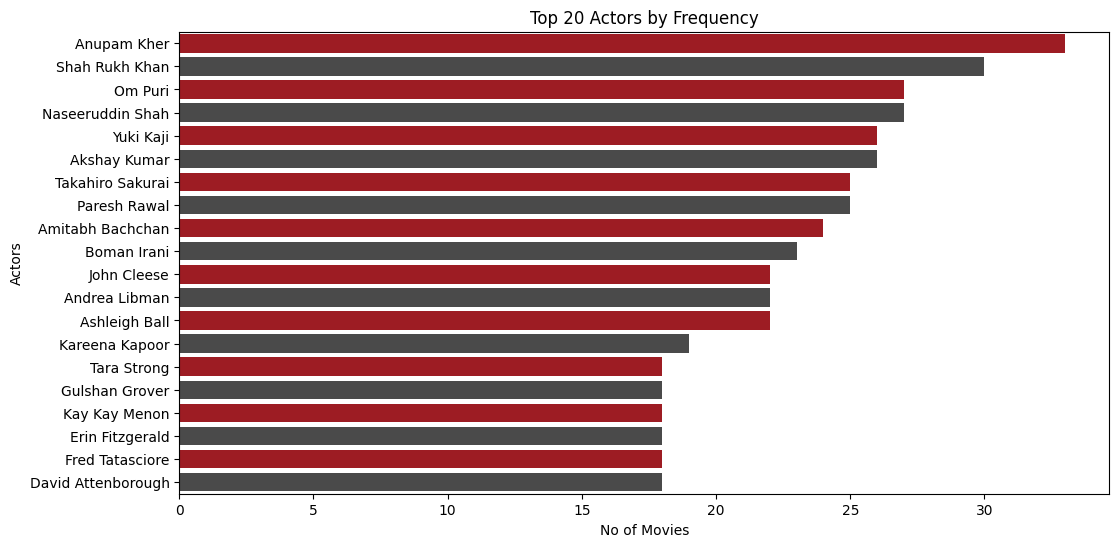

In [31]:
plt.figure(figsize=(12,6))
plt.title("Top 20 Actors by Frequency")
# Explode the 'cast' column to count individual actors, then filter
Top_20_Actors = df.explode('cast')['cast'].value_counts()[1:21] # Excluding 'unavailable' and taking top 20
sns.barplot(x=Top_20_Actors, y=Top_20_Actors.index, palette=['#b20710', '#4a4a4a'])
plt.xlabel('No of Movies')
plt.ylabel('Actors')



*   Anupam Kher has appeared in the most movies, followed by Shah Rukh Khan, Om Puri, and Naseeruddin Shah.
*   The list showcases a mix of Bollywood and international actors with varying levels of contributions.



**Top 10 Genres Analysis**

In [32]:
unique_genres = df['listed_in'].str.split(', ').explode().unique()
unique_genres

array(['Children & Family Movies', 'Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Crime TV Shows', 'International TV Shows',
       'Spanish-Language TV Shows', 'International Movies',
       'Sci-Fi & Fantasy', 'Thrillers', 'Docuseries',
       'Science & Nature TV', 'Action & Adventure', 'Dramas',
       'Cult Movies', 'Independent Movies', 'Romantic Movies',
       'Documentaries', 'Horror Movies', 'Romantic TV Shows',
       'TV Comedies', 'TV Dramas', 'TV Thrillers', 'TV Mysteries',
       'British TV Shows', 'Music & Musicals', 'Reality TV',
       'TV Action & Adventure', 'Anime Features', 'Teen TV Shows',
       'Faith & Spirituality', 'Korean TV Shows', 'Anime Series',
       'LGBTQ Movies', 'TV Horror', 'Movies',
       'Stand-Up Comedy & Talk Shows', 'TV Sci-Fi & Fantasy',
       'Classic Movies', 'Sports Movies', 'TV Shows', 'Classic & Cult TV'],
      dtype=object)

In [33]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
top_genres

,count
listed_in,
International Movies,1927
Dramas,1623
Comedies,1113
International TV Shows,1001
Documentaries,668
TV Dramas,599
Action & Adventure,597
Independent Movies,552
TV Comedies,436


<ipython-input-34-2cbf9b4ceb35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette=['#b20710', '#4a4a4a'])
<ipython-input-34-2cbf9b4ceb35>:2: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_genres.values, y=top_genres.index, palette=['#b20710', '#4a4a4a'])


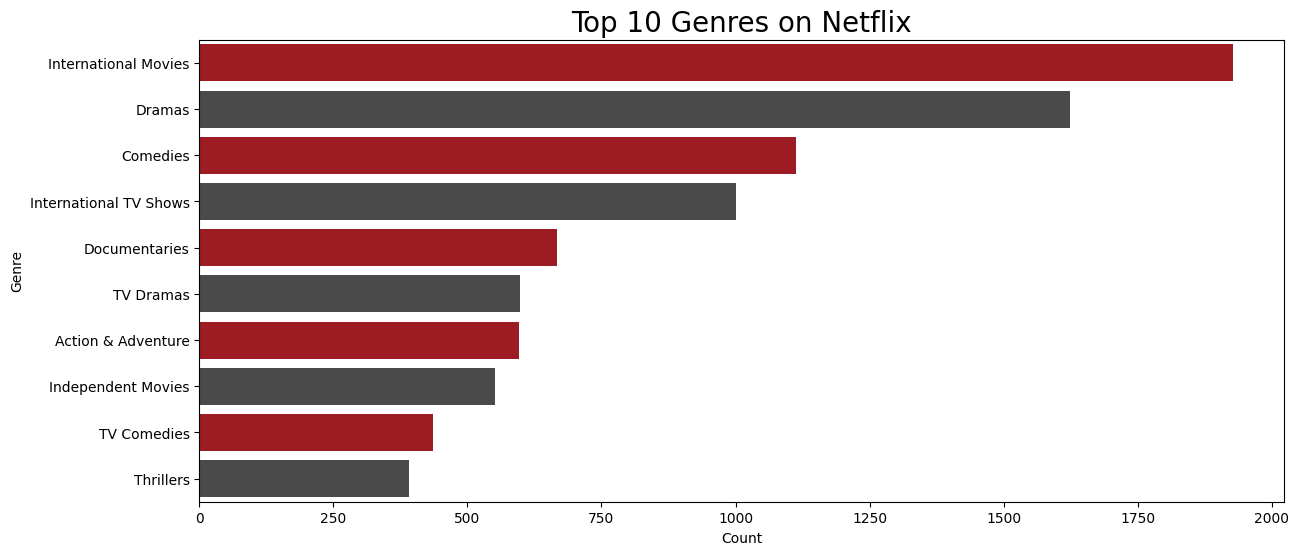

In [34]:
plt.figure(figsize=(14,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette=['#b20710', '#4a4a4a'])
plt.title('Top 10 Genres on Netflix', fontsize=20)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()



*   International Movies, Dramas, and Comedies are the most popular genres on Netflix, dominating the platform's content library.
*   This highlights Netflix's focus on diverse storytelling to appeal to global audiences.



**Release Year Distribution**

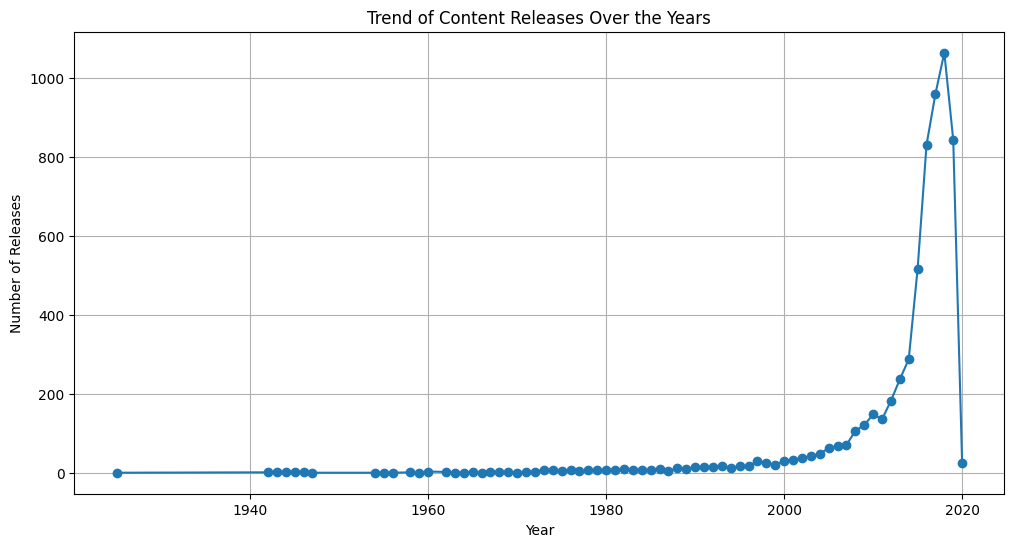

In [35]:
plt.figure(figsize=(12,6))
df.groupby('release_year')['show_id'].count().plot(kind='line', marker='o')
plt.title('Trend of Content Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()



*   The trend shows a dramatic exponential growth, particularly after the year 2000. Before that, the number of releases remained relatively stable and low for several decades
*   Around 2000-2010, there's a noticeable inflection point where growth begins to accelerate significantly.

*   The peak appears to be around 2015-2018, reaching approximately 1,150 releases.
*   After the peak, there's a sharp decline, dropping to around 60 releases by 2020.





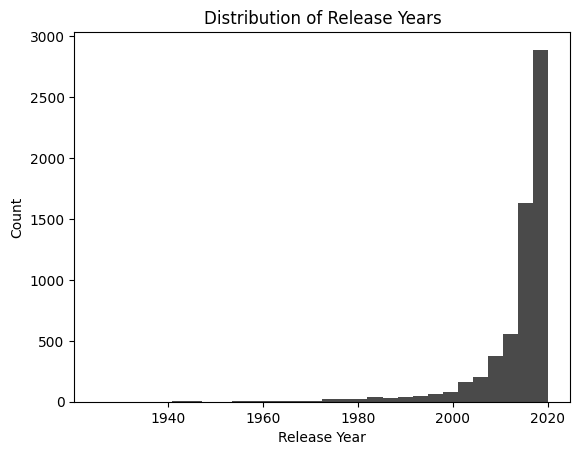

In [36]:
df['release_year'].plot(kind='hist', bins=30,color='#4a4a4a')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()



*   Most of the releases happened after 2000, with a sharp increase closer to 2020.
*   There were very few releases before 1980, indicating limited production or recording during those times.

*   The number of releases has steadily grown since 1980, reflecting advancements in technology, production capabilities, or demand.






# **Conclusion:**
The Netflix Data Exploratory Analysis provided valuable insights into the platform's content trends. It revealed a significant increase in the number of releases after 2000, with documentaries and stand-up comedy emerging as the most popular genres. Prominent actors like Anupam Kher and Shah Rukh Khan were identified as frequent contributors to Netflix's content.  

This project highlights the importance of exploratory data analysis in understanding data patterns and trends. The findings can assist stakeholders in making data-driven decisions to align with audience preferences and market demands.